In [1]:
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//Rtmpuihx4D/downloaded_packages


In [2]:
install.packages("tidymodels")

also installing the dependency ‘tune’





The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//Rtmpuihx4D/downloaded_packages


In [3]:
install.packages("rlang")


The downloaded binary packages are in
	/var/folders/wy/f2g87lw121qf8pt2k7_d4ysr0000gn/T//Rtmpuihx4D/downloaded_packages


In [4]:
library("tidymodels")
library("tidyverse")
library("stringr")

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.1
✔ dials        1.4.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.0     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discar

In [5]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)
spec(bike_sharing_df)

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  FUNCTIONING_DAY = col_character(),
  `0` = col_double(),
  `1` = col_double(),
  `10` = col_double(),
  `11` = col_double(),
  `12` = col_double(),
  `13` = col_double(),
  `14` = col_double(),
  `15` = col_double(),
  `16` = col_double(),
  `17` = col_double(),
  `18` = col_double(),
  `19` = col_double(),
  `2` = col_double(),
  `20` = col_double(),
  `21` = col_double(),
  `22` = col_double(),
  `23` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  AUTUMN = col_double(),
  SPRING = col_double(),
  SUMMER = col_double(),
  WINTER = col_double(),
  HOLIDAY 

In [6]:
bike_sharing_df <- bike_sharing_df %>% 
                   select(-DATE, -FUNCTIONING_DAY)

In [7]:
set.seed(1234)

# Split the data: 75% train, 25% test
split <- initial_split(bike_sharing_df, prop = 3/4)

# Create training and testing datasets
train_data <- training(split)
test_data  <- testing(split)


In [12]:
# Define the linear regression model specification
lm_model_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

In [13]:
# Fit the model formula and training data
lm_model_weather <- lm_model_spec %>%
  fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY +
      DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,
      data = train_data)

In [14]:
print(lm_model_weather$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
               156.71                2399.74                -918.38  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
               404.47                  12.56                -316.92  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
              -444.85               -1764.01                 317.78  



In [19]:
summary(lm_model_weather$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1348.46  -294.03   -57.28   208.59  2329.78 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             156.71      58.07   2.699  0.00698 ** 
TEMPERATURE            2399.74     261.66   9.171  < 2e-16 ***
HUMIDITY               -918.38     126.79  -7.243  4.9e-13 ***
WIND_SPEED              404.47      48.16   8.399  < 2e-16 ***
VISIBILITY               12.56      24.86   0.505  0.61351    
DEW_POINT_TEMPERATURE  -316.92     278.83  -1.137  0.25575    
SOLAR_RADIATION        -444.85      34.69 -12.824  < 2e-16 ***
RAINFALL              -1764.01     182.65  -9.658  < 2e-16 ***
SNOWFALL                317.78     131.58   2.415  0.01576 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [16]:
# Fit the model on train_data using all remaining predictors except response
lm_model_all <- lm_model_spec %>%
  fit(RENTED_BIKE_COUNT ~ ., data = train_data)

In [18]:
print(lm_model_all)

parsnip model object


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
               212.20                 782.66                -886.73  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
                31.91                  21.87                 598.39  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
               276.88               -2064.64                 260.97  
                  `0`                    `1`                   `10`  
               -29.30                -116.85                -237.52  
                 `11`                   `12`                   `13`  
              -247.38                -208.34                -191.35  
                 `14`                   `15`                   `16`  
              -192.44                -109.73                  23.13  
                 `17`                   `18`                

In [17]:
summary(lm_model_all$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1401.45  -218.96    -7.31   199.53  1780.67 

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             212.20      51.04   4.158 3.26e-05 ***
TEMPERATURE             782.66     212.13   3.690 0.000227 ***
HUMIDITY               -886.73      99.49  -8.913  < 2e-16 ***
WIND_SPEED               31.91      40.27   0.792 0.428169    
VISIBILITY               21.87      20.26   1.079 0.280439    
DEW_POINT_TEMPERATURE   598.39     221.37   2.703 0.006888 ** 
SOLAR_RADIATION         276.88      41.47   6.677 2.64e-11 ***
RAINFALL              -2064.64     143.28 -14.410  < 2e-16 ***
SNOWFALL                260.97     103.50   2.522 0.011709 *  
`0`                     -29.30      34.26  -0.855 0.392515    
`1`                    -116.85      33.72  -3.465 0.000533 ***
`10`                 

In [20]:
# test data
# For lm_model_weather 
test_results_weather <- test_data %>%
  mutate(
    prediction = predict(lm_model_weather, new_data = test_data) %>% pull(.pred),
    truth = RENTED_BIKE_COUNT
  ) %>%
  select(truth, prediction)

# For lm_model_all 
test_results_all <- test_data %>%
  mutate(
    prediction = predict(lm_model_all, new_data = test_data) %>% pull(.pred),
    truth = RENTED_BIKE_COUNT
  ) %>%
  select(truth, prediction)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `prediction = predict(lm_model_all, new_data = test_data) %>%
  pull(.pred)`.
Caused by warning in `predict.lm()`:
! prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


In [21]:
head(test_results_weather)

truth,prediction
<dbl>,<dbl>
100,317.54078
181,321.34748
360,593.09567
555,351.27184
600,138.78247
405,17.09947


In [22]:
head(test_results_all)

truth,prediction
<dbl>,<dbl>
100,-177.78433
181,-12.96778
360,219.89217
555,532.01325
600,591.78714
405,459.85379


In [23]:
# Calculate R-squared
rsq_weather <- rsq(test_results_weather, truth = truth, estimate = prediction)
rsq_all     <- rsq(test_results_all, truth = truth, estimate = prediction)

# Calculate RMSE
rmse_weather <- rmse(test_results_weather, truth = truth, estimate = prediction)
rmse_all     <- rmse(test_results_all, truth = truth, estimate = prediction)

# Print results
print(rsq_weather)
print(rsq_all)
print(rmse_weather)
print(rmse_all)

# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rsq     standard       0.439
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rsq     standard       0.669
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        475.
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard        364.


In [24]:
lm_model_all$fit$coefficients

(Intercept)           TEMPERATURE              HUMIDITY 
            212.19946             782.65787            -886.73028 
           WIND_SPEED            VISIBILITY DEW_POINT_TEMPERATURE 
             31.91299              21.87164             598.38726 
      SOLAR_RADIATION              RAINFALL              SNOWFALL 
            276.88165           -2064.63754             260.97330 
                  `0`                   `1`                  `10` 
            -29.29834            -116.84675            -237.51820 
                 `11`                  `12`                  `13` 
           -247.38341            -208.34133            -191.35423 
                 `14`                  `15`                  `16` 
           -192.44168            -109.73364              23.12816 
                 `17`                  `18`                  `19` 
            305.54762             794.80315             522.98821 
                  `2`                  `20`                  `21` 
           -237.21166             431.99524             446.58053 
                 `22`                  `23`                   `3` 
            342.64092             103.80841            -319.87152 
                  `4`                   `5`                   `6` 
           -386.29281            -362.72000            -204.11873 
                  `7`                   `8`                   `9` 
            106.75713             450.97753                    NA 
               AUTUMN                SPRING                SUMMER 
            358.99944             191.36527             198.14201 
               WINTER               HOLIDAY            NO_HOLIDAY 
                   NA            -124.42374                    NA

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`).”


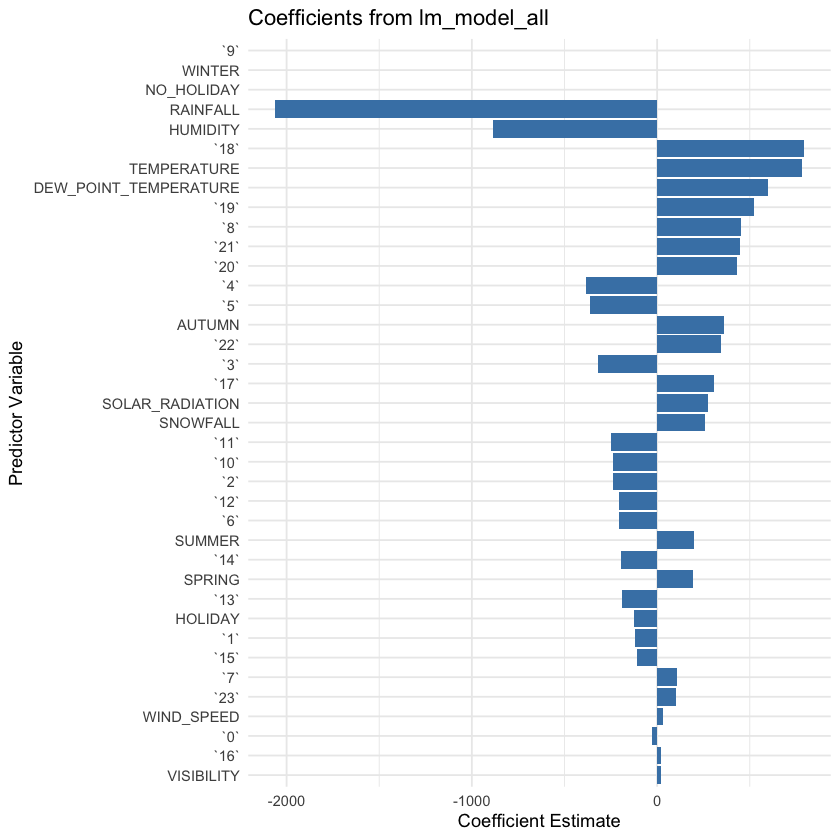

In [25]:
# Extract tidy coefficients
coef_df <- broom::tidy(lm_model_all$fit) %>%
  filter(term != "(Intercept)") %>%                  # exclude intercept
  mutate(abs_estimate = abs(estimate)) %>%          # add absolute value for sorting
  arrange(desc(abs_estimate))                         # sort descending by abs value

# Plot sorted coefficients
ggplot(coef_df, aes(x = reorder(term, abs_estimate), y = estimate)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +                                     # flip for easier reading
  labs(title = "Coefficients from lm_model_all",
       x = "Predictor Variable",
       y = "Coefficient Estimate") +
  theme_minimal()